In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.axes_style("white")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
def show_lineplot(df, hue='model', x='iteration', y='item_rank', xlabel='Iteration', ylabel='Item Rank', name="item_rank_iteration", save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
#     df = df.sort_values(by=['model'])
    #plt.axhline(y=0.165, color='r', linestyle='-')
    ax = sns.lineplot(x=x, y=y, hue=hue, style=hue, data=df, ci=68)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        fig.savefig('{0}/{1}.pdf'.format(fig_path, name),
                    bbox_inches="tight", pad_inches=0, format='pdf')
    else:
        plt.show()

def show_barplot(df, hue='Model', x='target_rank', y='Popularity', xlabel='Target Rank', ylabel='Popularity', name="item_pop", save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    df = df.sort_values(by=['Model'])
    #plt.axhline(y=0.165, color='r', linestyle='-')
#    ax = sns.barplot(y=x, x=y, hue=hue, data=df, orient='h', ci=68)
#    ax = sns.barplot(x=x, y=y, hue=hue, data=df, ci=68)
#    ax = sns.boxplot(x=x, y=y, hue=hue, data=df)
    ax = sns.violinplot(x=x, y=y, hue=hue, data=df)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:], labels=labels[0:])
#    ax.legend(handles=handles[1:], labels=labels[1:])
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        fig.savefig('{0}/{1}.pdf'.format(fig_path, name),
                    bbox_inches="tight", pad_inches=0, format='pdf')
    else:
        plt.show()


In [3]:
def save_dataframe_csv(df, path, name):
    df.to_csv(path+name, index=False)


def load_dataframe_csv(path, name, index_col=None):
    return pd.read_csv(path+name, index_col=index_col)

In [58]:
table_path = '../tables/critiquing/multi_step_critiquing/yelp/ranksvm/'
name = '25user_critique_lambda1to1.csv'
df = load_dataframe_csv(table_path, name)

In [5]:
def avg_successful_rate(df):
    num_runs = len(np.where(df['iteration'] == 0)[0])
    num_success = len(np.where(df['result'] == 'successful')[0])
    
    return num_success/num_runs

In [7]:
def avg_length(df,include_fail = True):
    num_runs = len(np.where(df['iteration'] == 0)[0])
    return len(df)/num_runs

In [10]:
avg_length(df)

17.711111111111112

In [44]:
avg_successful_rate(df)

0.6325301204819277

In [59]:
df_5 =  df[df['target_rank'] == 5]
df_10 = df[df['target_rank'] == 10]
df_20 = df[df['target_rank'] == 20]
df_50 = df[df['target_rank'] == 50]

# AVG

In [13]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.622222222222224
0.15555555555555556


In [14]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

16.8
0.28888888888888886


# RankSVM

## test with wrong obj

In [30]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.91111111111111
0.13333333333333333


In [29]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

17.066666666666666
0.26666666666666666


## 1 with 0-1 lamb and 2*uk

In [34]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.866666666666667
0.13333333333333333


In [33]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

16.977777777777778
0.28888888888888886


# 1 user with absolute objective

In [41]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.333333333333332
0.17777777777777778


In [42]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

16.711111111111112
0.3111111111111111


## 25 user with absolute objective

In [45]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

17.470175438596492
0.22807017543859648


In [46]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

15.256140350877192
0.3684210526315789


## 25 user avg

In [50]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

17.09122807017544
0.28421052631578947


In [51]:
print (avg_length(df_50))
print (avg_successful_rate(df_50))

14.901754385964912
0.38596491228070173


## 25 user absolute obj lambd -100 to 100

In [56]:
print (avg_length(df_5))
print (avg_successful_rate(df_5))

19.270175438596493
0.09824561403508772


In [57]:
print (avg_length(df_10))
print (avg_successful_rate(df_10))

18.736842105263158
0.12631578947368421


In [54]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.15438596491228
0.1649122807017544


### 25 user absolute obj lambda -1 to 1

In [60]:
print (avg_length(df_5))
print (avg_successful_rate(df_5))

19.256140350877192
0.10175438596491228


In [61]:
print (avg_length(df_20))
print (avg_successful_rate(df_20))

18.164912280701753
0.16140350877192983


## 50 user

### AVG

In [62]:
table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/'
name = 'average_50users.csv'
df = load_dataframe_csv(table_path, name)

df_20 = df[df['target_rank'] == 20]
df_50 = df[df['target_rank'] == 50]

print (avg_length(df_20))
print (avg_successful_rate(df_20))

print (avg_length(df_50))
print (avg_successful_rate(df_50))

17.003012048192772
0.2756024096385542
15.045180722891565
0.39457831325301207


In [63]:
table_path = '../tables/critiquing/multi_step_critiquing/yelp/rating/'
name = 'ratingobjective_50users.csv'
df = load_dataframe_csv(table_path, name)

df_20 = df[df['target_rank'] == 20]
df_50 = df[df['target_rank'] == 50]

print (avg_length(df_20))
print (avg_successful_rate(df_20))

print (avg_length(df_50))
print (avg_successful_rate(df_50))

18.408132530120483
0.16566265060240964
16.936746987951807
0.26656626506024095


In [64]:
table_path = '../tables/critiquing/multi_step_critiquing/yelp/ranksvm/'
name = 'ranksvm_50users.csv'
df = load_dataframe_csv(table_path, name)

df_20 = df[df['target_rank'] == 20]
df_50 = df[df['target_rank'] == 50]

print (avg_length(df_20))
print (avg_successful_rate(df_20))

print (avg_length(df_50))
print (avg_successful_rate(df_50))

17.593373493975903
0.21234939759036145
15.521084337349398
0.33433734939759036


# Tuning Lamb1 and Lamb2

In [2]:
def save_dataframe_csv(df, path, name):
    df.to_csv(path+name, index=False)


def load_dataframe_csv(path, name, index_col=None):
    return pd.read_csv(path+name, index_col=index_col)


In [5]:
lamb1 = 1
lamb2 = 1

table_path = '../tables/critiquing/tuning/'
name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
# save_dataframe_csv(df, table_path, name)
df = load_dataframe_csv(table_path,name)

In [3]:
def get_average_length(df, n):
    df_s_f = df[(df['result'] == 'successful') | (df['result'] == 'fail')]
    iteration = df_s_f[df_s_f['target_rank']==n].groupby('user_id', as_index=False).agg({'iteration':'mean'})['iteration'].to_numpy()
    return (np.average(iteration), 1.96*np.std(iteration)/np.sqrt(len(iteration)))

def get_success_num(df, n):
    return len(df[(df['result'] == 'successful') & (df['target_rank'] == n)])

def get_fail_num(df, n):
    return len(df[(df['result'] == 'fail') & (df['target_rank'] == n)])

def get_success_rate(df, n):
    df_s_f = df[(df['result'] == 'successful') | (df['result'] == 'fail')]
    df_list_result = df_s_f[df_s_f['target_rank']==n].groupby('user_id', as_index=False)['result'].apply(list).reset_index(name='result')
    successful_rate = df_list_result['result'].apply(lambda r: r.count("successful")/len(r)).to_numpy()
    return (np.average(successful_rate), 1.96*np.std(successful_rate)/np.sqrt(len(successful_rate)))


In [13]:
lambs = [0.001,0.01,0.1,1,10,100,1000]

In [14]:
table_path = '../tables/critiquing/tuning/'
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
    
        print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
        print ('avg_length: ',get_average_length(df,20))
        print ('suc_rate: ',get_success_rate(df,20))


lamb1:  0.001 , lamb2:  0.001
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1:  0.001 , lamb2:  0.01
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1:  0.001 , lamb2:  0.1
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1:  0.001 , lamb2:  1
avg_length:  (16.656986169897355, 1.0124591595305623)
suc_rate:  (0.22699545215992586, 0.06463024489350024)
lamb1:  0.001 , lamb2:  10
avg_length:  (16.648936160696028, 0.987942599960155)
suc_rate:  (0.22169563806076964, 0.057033637349996495)
lamb1:  0.001 , lamb2:  100
avg_length:  (16.648936160696028, 0.987942599960155)
suc_rate:  (0.22169563806076964, 0.057033637349996495)
lamb1:  0.001 , lamb2:  1000
avg_length:  (16.648936160696028, 0.987942599960155)
suc_rate:  (0.22169563806076964, 0.057033637349996495)
lamb1:  0.01 , lamb2:  0.001
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1:  0.01 , lamb2:  0.01
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1:  0.01 , lamb2:  0.1
avg_length:  (20.0, 0.0)
suc_rate:  (0.0, 0.0)
lamb1

In [48]:
table_path = '../tables/critiquing/tuning_ranksvm3_diff/'
lambs = lambs = [0.01,0.1,1,10,30,50,70,90,100]
lamb1 = 10

sr10 = [1]
for lamb2 in lambs:

    name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
    df = load_dataframe_csv(table_path,name)
    
    sr10.append(get_success_rate(df,20)[0])
sr10.append(sr10[-1])
#     print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
#     print ('avg_length: ',get_average_length(df,20))
#     print ('suc_rate: ',get_success_rate(df,20))

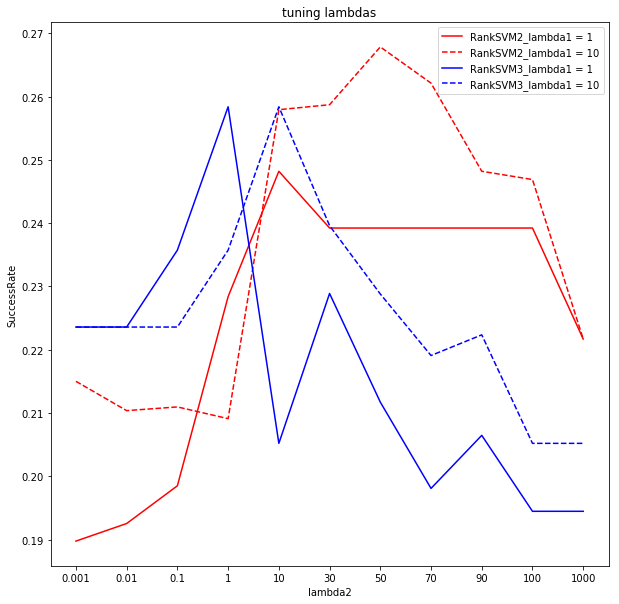

In [62]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(11),success_rates1,"r",label = "RankSVM2_lambda1 = 1")
plt.plot(np.arange(11), success_rates10,"r--",label = "RankSVM2_lambda1 = 10")
# plt.plot(np.arange(11), success_rates100,"r-.",label = "RankSVM2_lambda1 = 100")

plt.plot(np.arange(11),sr1,"b",label = "RankSVM3_lambda1 = 1")
plt.plot(np.arange(11), sr10,"b--",label = "RankSVM3_lambda1 = 10")
# plt.plot(np.arange(11), sr100,"b-.",label = "RankSVM3_lambda1 = 100")

# plt.xticks(lambs)
# x = [0.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
lambs = [0.001, 0.01,0.1,1,10,30,50,70,90,100, 1000]
xi = list(range(len(x)))
plt.xlabel('lambda2')
plt.ylabel("SuccessRate")
plt.title("tuning lambdas")
plt.xticks(xi, lambs)
plt.legend()
plt.savefig("../figs/tuning_ranksvm2_and3.png")

In [58]:
sr1[-1] = sr1[-2]
sr10[-1] = sr10[-2]
sr100[-1] = sr100[-2]

In [54]:
sr10[1]

0.22358957745470906

In [55]:
sr100[1]

0.22358957745470906

In [51]:
sr1[0] = 0.202

[0,
 0.22358957745470906,
 0.23574761617524778,
 0.2584028331561226,
 0.20520784344797502,
 0.22889343843291213,
 0.21172493746506904,
 0.19808652908981852,
 0.20647046971060126,
 0.19446904520917677,
 0]

In [4]:
# Orginal one-hot encoding averaging,
# new prediction = initial/num_critiques + critiqued
table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/test_with_onehot_critique_25users.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (15.954481875945694, 1.0930675137129924)
suc_rate:  (0.28832060057389003, 0.07097334293171635)


In [5]:
# one-hot encoding averaging
# new prediction = initial + critiqued
table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/test_with_onehot_critique_25users_correct_prediction.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (16.65485766061424, 0.9474722722897446)
suc_rate:  (0.23899926219005166, 0.0627783514828643)


In [6]:
# use user-keyphrase frequency as critique vector averaging
# new prediction = initial + critiqued
table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/test_with_uk_critique_25users_correct_prediction.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (16.648936160696028, 0.987942599960155)
suc_rate:  (0.22169563806076964, 0.057033637349996495)


In [7]:
# use user-keyphrase frequency as critique vector averaging
# new prediction = theta[0]*initial/num_critiques + critiqued
table_path = '../tables/critiquing/multi_step_critiquing/yelp/ranksvm/lamb100_100_new_prediction_method_25user.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (16.09175009627312, 1.1116775712841986)
suc_rate:  (0.27679065878079034, 0.07455656532945706)


In [8]:
# use user-keyphrase frequency as critique vector averaging
# new prediction = initial/num_critiques + critiqued
table_path = '../tables/critiquing/multi_step_critiquing/yelp/ranksvm/lamb100_100_new_prediction_method_notheta0_25user.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (16.354464176174705, 1.0155681616698524)
suc_rate:  (0.2563361133262449, 0.06405152246491823)


In [9]:
## use user-keyphrase frequency as critique vector averaging
# no intial prediction
table_path = '../tables/critiquing/multi_step_critiquing/yelp/ranksvm/lamb100_100_new_prediction_method_noinitial_25user.csv'
df = load_dataframe_csv(table_path,"")       
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (16.103395629711418, 1.0698415037433144)
suc_rate:  (0.28175172780435936, 0.07399945541270281)


# Friday Night experiment

In [10]:
lambs = [1,10,20,30,40,50,60,70,80,90,100]

In [12]:
table_path = '../tables/critiquing/tuning/'
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
    
        print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
        print ('avg_length: ',get_average_length(df,20))
        print ('suc_rate: ',get_success_rate(df,20))

lamb1:  1 , lamb2:  1
avg_length:  (16.712712865837865, 1.046770275957054)
suc_rate:  (0.22839929320192476, 0.06488599196266555)
lamb1:  1 , lamb2:  10
avg_length:  (16.047486185232895, 1.083286344838874)
suc_rate:  (0.24821200363963522, 0.058421253849105174)
lamb1:  1 , lamb2:  20
avg_length:  (16.23445440402677, 1.0647649780004353)
suc_rate:  (0.24395468688231847, 0.05911711472122202)
lamb1:  1 , lamb2:  30
avg_length:  (16.25907561614798, 1.0600557676089697)
suc_rate:  (0.23924088216851377, 0.05804357957890585)
lamb1:  1 , lamb2:  40
avg_length:  (16.25907561614798, 1.0600557676089697)
suc_rate:  (0.23924088216851377, 0.05804357957890585)
lamb1:  1 , lamb2:  50
avg_length:  (16.25907561614798, 1.0600557676089697)
suc_rate:  (0.23924088216851377, 0.05804357957890585)
lamb1:  1 , lamb2:  60
avg_length:  (16.25907561614798, 1.0600557676089697)
suc_rate:  (0.23924088216851377, 0.05804357957890585)
lamb1:  1 , lamb2:  70
avg_length:  (16.25907561614798, 1.0600557676089697)
suc_rate:  (0.

lamb1:  50 , lamb2:  100
avg_length:  (15.967622411701358, 1.1245356227016365)
suc_rate:  (0.28496007221336167, 0.0681209389286149)
lamb1:  60 , lamb2:  1
avg_length:  (16.870893291041316, 1.0613835836532335)
suc_rate:  (0.19480574554587715, 0.061360609328757615)
lamb1:  60 , lamb2:  10
avg_length:  (16.50649656143077, 1.0592550832709988)
suc_rate:  (0.2431865892392208, 0.06234039936657734)
lamb1:  60 , lamb2:  20
avg_length:  (16.335056558329587, 1.0432518672120565)
suc_rate:  (0.2676447121348437, 0.0679322890377424)
lamb1:  60 , lamb2:  30
avg_length:  (16.395333330777408, 1.0646612111830154)
suc_rate:  (0.2401615471516787, 0.06441648060375664)
lamb1:  60 , lamb2:  40
avg_length:  (16.298600163238323, 1.1058264081258768)
suc_rate:  (0.25922924845622214, 0.07617352423587406)
lamb1:  60 , lamb2:  50
avg_length:  (16.330104861025912, 1.0868039137687022)
suc_rate:  (0.2479186049087365, 0.06973970492843105)
lamb1:  60 , lamb2:  60
avg_length:  (16.10361416117995, 1.0699718958735802)
suc_r

In [14]:
highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

lamb1:  30 , lamb2:  60
avg_length:  (15.93832948240843, 1.1353689946519585)
suc_rate:  (0.2973803273967748, 0.0744214795957873)


In [8]:
table_path = '../tables/critiquing/tuning/'
name = 'lamb1_'+ str(30)+'_lamb2_' + str(60) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

avg_length:  (13.998993051295683, 1.2850615177227607)
suc_rate:  (0.37932027767554083, 0.07501891024325127)


# Sat afternoon Experiment, using random instead of diff

In [25]:
lambs = [0.01,0.1,1,10,30,50,70,90,100,1000]

In [18]:
table_path = '../tables/critiquing/tuning_random/'
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
    
        print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
        print ('avg_length: ',get_average_length(df,20))
        print ('suc_rate: ',get_success_rate(df,20))

lamb1:  0.01 , lamb2:  0.01
avg_length:  (19.449605898804982, 0.35755409758218515)
suc_rate:  (0.0, 0.0)
lamb1:  0.01 , lamb2:  0.1
avg_length:  (19.449605898804982, 0.35755409758218515)
suc_rate:  (0.0, 0.0)
lamb1:  0.01 , lamb2:  1
avg_length:  (18.341248606465996, 0.6553790812911513)
suc_rate:  (0.10444152846898842, 0.04980727738617254)
lamb1:  0.01 , lamb2:  10
avg_length:  (18.433033067872888, 0.7329940995171339)
suc_rate:  (0.08160023932335143, 0.043392415900021)
lamb1:  0.01 , lamb2:  30
avg_length:  (18.00401644503475, 0.6418146503636835)
suc_rate:  (0.11068411629052362, 0.04366724553066391)
lamb1:  0.01 , lamb2:  50
avg_length:  (17.85101587962, 0.7603938895765076)
suc_rate:  (0.11051564758658579, 0.0503822567289223)
lamb1:  0.01 , lamb2:  70
avg_length:  (17.986760049002612, 0.6510015685056515)
suc_rate:  (0.09037656978160409, 0.03851250057226915)
lamb1:  0.01 , lamb2:  90
avg_length:  (17.852754263280577, 0.7106554440826633)
suc_rate:  (0.10625565637007284, 0.046802972858986

avg_length:  (18.016153903939944, 0.6962840693861192)
suc_rate:  (0.109190501209952, 0.04579595831948261)
lamb1:  70 , lamb2:  70
avg_length:  (18.101567336807612, 0.7238223931272895)
suc_rate:  (0.11016430810481155, 0.05105977161608013)
lamb1:  70 , lamb2:  90
avg_length:  (17.781334223239263, 0.7800011322126464)
suc_rate:  (0.12689725098191917, 0.04968968303412761)
lamb1:  70 , lamb2:  100
avg_length:  (17.842703771565326, 0.6678116227885134)
suc_rate:  (0.13246460823691944, 0.04467765276546106)
lamb1:  70 , lamb2:  1000
avg_length:  (18.033860453683108, 0.8346153051102503)
suc_rate:  (0.09689955353570913, 0.05198162511461601)
lamb1:  90 , lamb2:  0.01
avg_length:  (18.02657298206497, 0.7607977254847429)
suc_rate:  (0.13646702902995808, 0.05368547883910841)
lamb1:  90 , lamb2:  0.1
avg_length:  (18.21464748701591, 0.6031432296051684)
suc_rate:  (0.14151164434345212, 0.04882544358975456)
lamb1:  90 , lamb2:  1
avg_length:  (17.615287890345094, 0.830492822364516)
suc_rate:  (0.14614406

In [19]:
# Best lambda values given largest success rate and performance

highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

lamb1:  10 , lamb2:  0.1
avg_length:  (17.898694034163142, 0.8034898432804136)
suc_rate:  (0.14631298018025704, 0.058484179397079165)


In [27]:
# Best lambda values given largest success rate and performance at top50

highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,50)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

lamb1:  30 , lamb2:  1
avg_length:  (16.34818351620411, 0.8906851183220629)
suc_rate:  (0.25936654878302473, 0.08291712703103085)


In [23]:
# Avg performance

table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/'
name = 'random_25user.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (17.948449465611933, 0.7559111488630073)
suc_rate:  (0.09899114361356923, 0.047233394015732476)


In [28]:
# Avg performance

table_path = '../tables/critiquing/multi_step_critiquing/yelp/avg/'
name = 'random_25user.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

avg_length:  (16.89367644496363, 0.888253318488126)
suc_rate:  (0.17540319139289384, 0.05360965785435396)


# Sat Evening Experiment of RankSVM3

In [12]:
lambs = [0.01,0.1,1,10,30,50,70,90,100,1000]

In [33]:
table_path = '../tables/critiquing/tuning_ranksvm3/'
for lamb in lambs:
        
    name = 'lamb_'+ str(lamb) +'_test.csv'
    df = load_dataframe_csv(table_path,name)

    print ('lamb: ',lamb)
    print ('avg_length: ',get_average_length(df,20))
    print ('suc_rate: ',get_success_rate(df,20))

lamb:  0.01
avg_length:  (17.809496989788748, 0.7273036855837584)
suc_rate:  (0.11455434026944322, 0.04442104763315606)
lamb:  0.1
avg_length:  (17.769271664008503, 0.715248531301992)
suc_rate:  (0.14043520044664207, 0.05417576844059579)
lamb:  1
avg_length:  (17.835797510397054, 0.7455951674433285)
suc_rate:  (0.12501978062618796, 0.05561369985319594)
lamb:  10
avg_length:  (17.705078620210198, 0.7592800959477547)
suc_rate:  (0.14682565400528785, 0.04964228858559208)
lamb:  30
avg_length:  (17.67785947843156, 0.6078276736393621)
suc_rate:  (0.1519686168141546, 0.05463446719234482)
lamb:  50
avg_length:  (18.009633364982335, 0.6747669600741912)
suc_rate:  (0.12681028290296026, 0.05147825904053108)
lamb:  70
avg_length:  (17.774711958522026, 0.695895915233447)
suc_rate:  (0.12284546752510138, 0.04613755773487017)
lamb:  90
avg_length:  (17.84569986967012, 0.6982131959074807)
suc_rate:  (0.1326073843522356, 0.05156377807481029)
lamb:  100
avg_length:  (17.731335534539195, 0.8674751156511

In [14]:
table_path = '../tables/critiquing/tuning_ranksvm3_random/'
for lamb in lambs:
        
    name = 'lamb_'+ str(lamb) +'_test.csv'
    df = load_dataframe_csv(table_path,name)

    print ('lamb: ',lamb)
    print ('avg_length: ',get_average_length(df,50))
    print ('suc_rate: ',get_success_rate(df,50))

lamb:  0.01
avg_length:  (16.32087618394826, 0.9161347007028843)
suc_rate:  (0.21874634391796863, 0.05709411466005028)
lamb:  0.1
avg_length:  (16.796223678431915, 1.0873371934568796)
suc_rate:  (0.18770474059375658, 0.0675342268662083)
lamb:  1
avg_length:  (16.537390228637367, 0.9230326205277359)
suc_rate:  (0.23198322780702638, 0.06296149194601566)
lamb:  10
avg_length:  (16.206520761211838, 0.9382716857255727)
suc_rate:  (0.24846277864012417, 0.0707159394290006)
lamb:  30
avg_length:  (16.18064836892068, 1.1593800472160827)
suc_rate:  (0.22908421034851242, 0.07910858254972869)
lamb:  50
avg_length:  (16.31759119979944, 1.0237276277714125)
suc_rate:  (0.23895552070609274, 0.07894425859691025)
lamb:  70
avg_length:  (16.58795791038354, 0.8874907767478744)
suc_rate:  (0.24099808150151397, 0.06317103231497095)
lamb:  90
avg_length:  (16.378949257581983, 1.009452076148892)
suc_rate:  (0.25988304538075707, 0.0880003856369011)
lamb:  100
avg_length:  (16.06972397358553, 0.92497825288634)


### Rating Objective

In [34]:
# Random 
table_path = '../tables/critiquing/multi_step_critiquing/yelp/rating/'
name = 'rating_25user_random.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (18.046238658366807, 0.6537610235094382)
suc_rate:  (0.09284945921101527, 0.04132267842400911)


In [6]:
# Random 
table_path = '../tables/critiquing/multi_step_critiquing/yelp/rating/'
name = 'rating_25user_random.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

avg_length:  (16.97611720532201, 0.9325394144433178)
suc_rate:  (0.16807151340904203, 0.06538446733950773)


In [35]:
# Diff
table_path = '../tables/critiquing/multi_step_critiquing/yelp/rating/'
name = 'rating_25user_diff.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

avg_length:  (17.309917196594828, 0.8586851028916351)
suc_rate:  (0.16062944730707887, 0.04913946934691592)


In [7]:
# Diff
table_path = '../tables/critiquing/multi_step_critiquing/yelp/rating/'
name = 'rating_25user_diff.csv'
df = load_dataframe_csv(table_path,name)
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

avg_length:  (15.254113929442875, 1.2300913081943443)
suc_rate:  (0.2808759192805245, 0.0691376397808046)


# RankSVM3 single lambda for Diff

In [36]:
lambs = [0.01,0.1,1,10,30,50,70,90,100,1000]
table_path = '../tables/critiquing/tuning_ranksvm3_diff/'
for lamb in lambs:
        
    name = 'lamb_'+ str(lamb) +'_test.csv'
    df = load_dataframe_csv(table_path,name)

    print ('lamb: ',lamb)
    print ('avg_length: ',get_average_length(df,20))
    print ('suc_rate: ',get_success_rate(df,20))

lamb:  0.01
avg_length:  (16.588793063052933, 1.0060076162398666)
suc_rate:  (0.22358957745470906, 0.05741935756618009)
lamb:  0.1
avg_length:  (16.359719048617077, 0.9790634002376569)
suc_rate:  (0.23574761617524778, 0.05466027265238925)
lamb:  1
avg_length:  (16.365770858040595, 0.9579935029814082)
suc_rate:  (0.2584028331561226, 0.06636988944816283)
lamb:  10
avg_length:  (16.724807091665642, 0.9270117548476825)
suc_rate:  (0.20520784344797502, 0.05684771980682749)
lamb:  30
avg_length:  (16.62498743337559, 0.9576677018603679)
suc_rate:  (0.22889343843291213, 0.06472245926438955)
lamb:  50
avg_length:  (16.69099290390409, 0.9652684009260489)
suc_rate:  (0.21172493746506904, 0.060671140360066066)
lamb:  70
avg_length:  (16.83202467914639, 0.9454185759492753)
suc_rate:  (0.19808652908981852, 0.054099444325286586)
lamb:  90
avg_length:  (16.902942528353712, 1.004923772954367)
suc_rate:  (0.20647046971060126, 0.06026247234340568)
lamb:  100
avg_length:  (16.942427117838303, 1.0020109253

In [16]:
lambs = [0.01,0.1,1,10,30,50,70,90,100,1000]
table_path = '../tables/critiquing/tuning_ranksvm3_diff/'
for lamb in lambs:
        
    name = 'lamb_'+ str(lamb) +'_test.csv'
    df = load_dataframe_csv(table_path,name)

    print ('lamb: ',lamb)
    print ('avg_length: ',get_average_length(df,50))
    print ('suc_rate: ',get_success_rate(df,50))

lamb:  0.01
avg_length:  (14.140220716783217, 1.3534970826611041)
suc_rate:  (0.3799492052781526, 0.08345913439203766)
lamb:  0.1
avg_length:  (13.841428646280619, 1.3563531210824116)
suc_rate:  (0.39662473247999563, 0.08325819085212377)
lamb:  1
avg_length:  (14.308813293188294, 1.3032345766642393)
suc_rate:  (0.3748545679466732, 0.08039917443195378)
lamb:  10
avg_length:  (14.868009719325508, 1.2868939537173238)
suc_rate:  (0.32164705421284373, 0.07988259286722449)
lamb:  30
avg_length:  (14.866978872735451, 1.2703526006583539)
suc_rate:  (0.33982887239466186, 0.0762722874650088)
lamb:  50
avg_length:  (14.854994168234299, 1.3311357506195984)
suc_rate:  (0.3458752930792404, 0.0750673769510871)
lamb:  70
avg_length:  (14.876948529662345, 1.3323235560861386)
suc_rate:  (0.34986630389590917, 0.07517174886456349)
lamb:  90
avg_length:  (14.84345570669584, 1.2859681935284772)
suc_rate:  (0.3365957781253834, 0.07641251065629355)
lamb:  100
avg_length:  (14.816940555180686, 1.28684693575105

## RankSVM3 2D lambda for diff

In [37]:
table_path = '../tables/critiquing/tuning_ranksvm3_diff/'
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
    
        print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
        print ('avg_length: ',get_average_length(df,20))
        print ('suc_rate: ',get_success_rate(df,20))

lamb1:  0.01 , lamb2:  0.01
avg_length:  (16.365770858040595, 0.9579935029814082)
suc_rate:  (0.2584028331561226, 0.06636988944816283)
lamb1:  0.01 , lamb2:  0.1
avg_length:  (16.724807091665642, 0.9270117548476825)
suc_rate:  (0.20520784344797502, 0.05684771980682749)
lamb1:  0.01 , lamb2:  1
avg_length:  (16.942427117838303, 1.002010925345077)
suc_rate:  (0.19446904520917677, 0.05778881807107767)
lamb1:  0.01 , lamb2:  10
avg_length:  (16.898581973581972, 0.9951151084937001)
suc_rate:  (0.20752830259409205, 0.06677063861324493)
lamb1:  0.01 , lamb2:  30
avg_length:  (16.87863895363895, 1.0065033278214415)
suc_rate:  (0.20213019193282347, 0.06550446515425662)
lamb1:  0.01 , lamb2:  50
avg_length:  (16.87863895363895, 1.0065033278214415)
suc_rate:  (0.20213019193282347, 0.06550446515425662)
lamb1:  0.01 , lamb2:  70
avg_length:  (16.87863895363895, 1.0065033278214415)
suc_rate:  (0.20213019193282347, 0.06550446515425662)
lamb1:  0.01 , lamb2:  90
avg_length:  (16.880831936095092, 1.006

avg_length:  (16.168202180373232, 1.0077060193325615)
suc_rate:  (0.27397079346092507, 0.06652557163109797)
lamb1:  70 , lamb2:  70
avg_length:  (16.365770858040595, 0.9579935029814082)
suc_rate:  (0.2584028331561226, 0.06636988944816283)
lamb1:  70 , lamb2:  90
avg_length:  (16.457370857699804, 0.9355672533113849)
suc_rate:  (0.2535077282610177, 0.061460830332203065)
lamb1:  70 , lamb2:  100
avg_length:  (16.502983998214262, 0.9940426135142226)
suc_rate:  (0.23052876095639255, 0.06137609549721574)
lamb1:  70 , lamb2:  1000
avg_length:  (16.664534046606416, 0.9524476061065584)
suc_rate:  (0.21947025927289085, 0.0646357201840076)
lamb1:  90 , lamb2:  0.01
avg_length:  (16.588793063052933, 1.0060076162398666)
suc_rate:  (0.22358957745470906, 0.05741935756618009)
lamb1:  90 , lamb2:  0.1
avg_length:  (16.588793063052933, 1.0060076162398666)
suc_rate:  (0.22358957745470906, 0.05741935756618009)
lamb1:  90 , lamb2:  1
avg_length:  (16.588793063052933, 1.0060076162398666)
suc_rate:  (0.22358

In [38]:
# Best 
highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

lamb1:  50 , lamb2:  30
avg_length:  (16.061253390858653, 1.0038779239856612)
suc_rate:  (0.28280834662413606, 0.07093800923518241)


In [17]:
# Best 
highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

lamb1:  50 , lamb2:  30
avg_length:  (14.03633814102564, 1.30260904283099)
suc_rate:  (0.3760536795076268, 0.07371147861292143)


# RandSVM 2d lambda for random

In [39]:
table_path = '../tables/critiquing/tuning_ranksvm3_random/'
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
    
        print ('lamb1: ',lamb1, ", lamb2: ",lamb2)
        print ('avg_length: ',get_average_length(df,20))
        print ('suc_rate: ',get_success_rate(df,20))

lamb1:  0.01 , lamb2:  0.01
avg_length:  (17.956770908344136, 0.6368476557776691)
suc_rate:  (0.11810787420055154, 0.04765795441248264)
lamb1:  0.01 , lamb2:  0.1
avg_length:  (17.85965699060665, 0.7429917769528366)
suc_rate:  (0.1475067743088338, 0.05549736865306147)
lamb1:  0.01 , lamb2:  1
avg_length:  (17.556867722285343, 0.747538051457003)
suc_rate:  (0.14964901612498865, 0.05539782333423902)
lamb1:  0.01 , lamb2:  10
avg_length:  (17.466532869622114, 0.7474780165111008)
suc_rate:  (0.14437303416136366, 0.05352088225207561)
lamb1:  0.01 , lamb2:  30
avg_length:  (17.844378834996682, 0.7566928765724089)
suc_rate:  (0.1391633284081797, 0.05586918691577601)
lamb1:  0.01 , lamb2:  50
avg_length:  (17.655924519797516, 0.7354524502620451)
suc_rate:  (0.13929977027803114, 0.050396919161413624)
lamb1:  0.01 , lamb2:  70
avg_length:  (17.98652294819343, 0.6367188403111427)
suc_rate:  (0.11550449931456798, 0.04572593673175304)
lamb1:  0.01 , lamb2:  90
avg_length:  (18.039456170577456, 0.69

lamb1:  70 , lamb2:  30
avg_length:  (17.97592051033126, 0.7751706764374868)
suc_rate:  (0.11967583331999808, 0.049154513970431704)
lamb1:  70 , lamb2:  50
avg_length:  (18.054934377216984, 0.7174548525797129)
suc_rate:  (0.12064323929312488, 0.05159768406030375)
lamb1:  70 , lamb2:  70
avg_length:  (17.819001425094104, 0.8303327862706494)
suc_rate:  (0.1358923018247961, 0.05722992583782392)
lamb1:  70 , lamb2:  90
avg_length:  (17.844878418047756, 0.777867881661188)
suc_rate:  (0.13258838161584158, 0.052525935668028004)
lamb1:  70 , lamb2:  100
avg_length:  (17.885772706825342, 0.6462761449372079)
suc_rate:  (0.13425262126635124, 0.053527662847376596)
lamb1:  70 , lamb2:  1000
avg_length:  (17.46782016610392, 0.6696451097932525)
suc_rate:  (0.14244402305043033, 0.0519885375596169)
lamb1:  90 , lamb2:  0.01
avg_length:  (18.045873583573815, 0.6835066773928457)
suc_rate:  (0.1048853701599697, 0.04841858984798958)
lamb1:  90 , lamb2:  0.1
avg_length:  (17.780856532229528, 0.8571825666245

In [40]:
# Best 
highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,20))
print ('suc_rate: ',get_success_rate(df,20))

lamb1:  0.1 , lamb2:  0.1
avg_length:  (17.50703099024037, 0.7773728918571633)
suc_rate:  (0.16363162962133213, 0.0549345377707224)


In [15]:
table_path = '../tables/critiquing/tuning_ranksvm3_random/'
# Best 
highest = 0
for lamb1 in lambs:
    for lamb2 in lambs:
        
        name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
        df = load_dataframe_csv(table_path,name)
        
        sr = get_success_rate(df,20)[0]
        if sr > highest:
            index = (lamb1,lamb2)
            highest = sr
name = 'lamb1_'+ str(index[0])+'_lamb2_' + str(index[1]) + '_test.csv'
df = load_dataframe_csv(table_path,name)
print ('lamb1: ',index[0], ", lamb2: ",index[1])
print ('avg_length: ',get_average_length(df,50))
print ('suc_rate: ',get_success_rate(df,50))

lamb1:  0.1 , lamb2:  0.1
avg_length:  (16.816420675688413, 0.8508231080020625)
suc_rate:  (0.2242596489450036, 0.06862834925000649)


# Plot avg, rating, ranksvm2 and 3

In [61]:
def get_success_rates_and_avg_length(lambs, model_name,topk = 20):
    if model_name == "ranksvm2_random":
        table_path = '../tables/critiquing/tuning_random/'
    elif model_name == "ranksvm2_diff":
        table_path = '../tables/critiquing/tuning/'
    elif model_name == "ranksvm3_random":
        table_path = '../tables/critiquing/tuning_ranksvm3_random/'
    elif model_name == "ranksvm3_diff":
        table_path = '../tables/critiquing/tuning_ranksvm3_diff/'
    
    success_rate = []
    avg_length = []
    
    if type(lambs) == list:
        print ("2D regularization")
        for lamb1 in lambs:
            for lamb2 in lambs:
                name = 'lamb1_'+ str(lamb1)+'_lamb2_' + str(lamb2) + '_test.csv'
                df = load_dataframe_csv(table_path,name)

                success_rate.append(get_average_length(df,topk)[0])
                avg_length.append(get_success_rate(df,topk)[0])
    else:
        print ("single lambda regularization")
        for lamb in lambs:
            name = 'lamb_'+ str(lamb) + '_test.csv'
            df = load_dataframe_csv(table_path,name)
            success_rate.append(get_average_length(df,topk)[0])
            avg_length.append(get_success_rate(df,topk)[0])
    return success_rate,avg_length